In [140]:
# num_shells high AND root_shell 
# num_shells high AND su_attempted > 0
# num_access_files
# srv_serror_rate
# is_host_login , is_guest_login #Remove one of these definitely 
#important correlated attributes

In [141]:
# Inferences
# If connection duration is 29053 or above high probability of it being an anamoly
# Anomaly is 50% for protocol type tcp and very low for protocl type udp similar to protocol type icmp
# Service is useful
# 'SH', 'RSTOS0' If either of these 2 flags are present then it is most definitely an anamoly
# Wrong_fragment value of 1,3 is a definite anomaly
# Keeping num_compromised purely on logical standpoint 
# Most entries of count lie as 0 and many but less than most are outliners as normal but how count is mostly anomaly
# Lesson learnt before declaring an attribute useless make sure that it doesnt overlap with other meaningful features if it overlaps confirm deletion else keep both the features
# Rerror_rate is important(came to the conclusion by means of histogram as anomaly entries are more as the % increases)
# srv_rerror_rate useful as there exists almost clear distinction for normal and anomal entries using this
# dst_host_diff_srv_rate , this suggests that the dataset is suited to more generic attacks as all attackers seem to target random servicers and dont target any one service in specific

In [142]:
# Removals
# Service Type doesnt seem to be of any use
# remove src_bytes, dst_bytes
# land 
# urgent
# hot
# num_failed_logins
# logged_in
# root_shell
# su_attempted
# num_root
# num_file_creations
# num_shells
# num_access_files
# num_outbound_cmds
# is_host_login
# is_guest_login
# srv_count
# diff_srv_rate
# dst_host_same_src_port_rate
# dst_host_srv_diff_host_rate
# dst_host_rerror_rate
# dst_host_srv_rerror_rate

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [144]:
ds = pd.read_csv("./Train_data.csv")
ds.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
print(ds['duration'].max())
print(ds['duration'].min())

42862
0


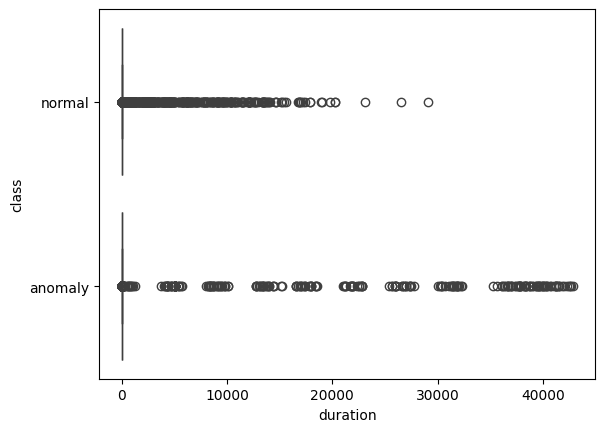

29053


In [146]:
sns.boxplot(x=ds['duration'],y=ds['class'])
plt.show()
threshold = ds[ds['class']=='normal']['duration'].max()
print(threshold)

In [148]:
ds['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [149]:
ds['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [ ]:
df = pd.get_dummies(ds,columns=['protocol_type'],drop_first=True)
df.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,protocol_type_tcp,protocol_type_udp
0,0,ftp_data,SF,491,0,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,True,False
1,0,other,SF,146,0,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,False,True
2,0,private,S0,0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,True,False
3,0,http,SF,232,8153,0,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,True,False
4,0,http,SF,199,420,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,True,False


[]

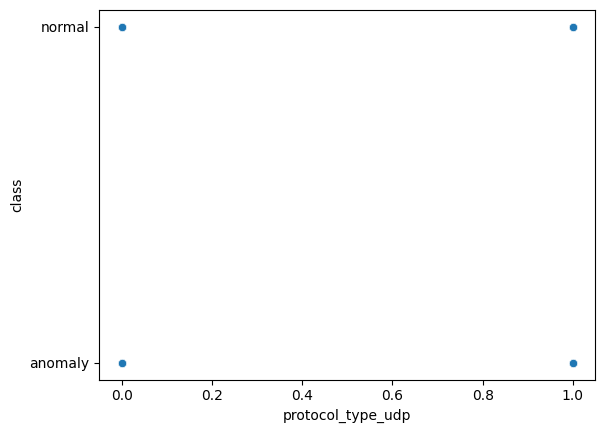

In [ ]:
sns.scatterplot(x=df['protocol_type_udp'],y=df['class'])
plt.plot()

In [ ]:
count_protocol_type_tcp = df.groupby('class')['protocol_type_tcp'].value_counts().unstack()
count_protocol_type_udp = df.groupby('class')['protocol_type_udp'].value_counts().unstack()
print("Count of A with respect to C:\n", count_protocol_type_tcp)
print("\nCount of B with respect to C:\n", count_protocol_type_udp)

Count of A with respect to C:
 protocol_type_tcp  False  True 
class                          
anomaly             1898   9845
normal              2768  10681

Count of B with respect to C:
 protocol_type_udp  False  True 
class                          
anomaly            11239    504
normal             10942   2507


In [ ]:
df = pd.get_dummies(df,columns=['service'],drop_first=True)
df.head()

,duration,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,service_systat,service_telnet,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
0,0,SF,491,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,0,SF,146,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,0,S0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,0,SF,232,8153,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
4,0,SF,199,420,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
ds['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001'], dtype=object)

In [ ]:
from scipy.stats import chi2_contingency

encoded_columns = ['service_ftp_data', 'service_other', 'service_private', 'service_http', 
       'service_remote_job', 'service_name', 'service_netbios_ns', 'service_eco_i', 
       'service_mtp', 'service_telnet', 'service_finger', 'service_domain_u', 
       'service_supdup', 'service_uucp_path', 'service_Z39_50', 'service_smtp', 
       'service_csnet_ns', 'service_uucp', 'service_netbios_dgm', 'service_urp_i', 
       'service_auth', 'service_domain', 'service_ftp', 'service_bgp', 'service_ldap', 
       'service_ecr_i', 'service_gopher', 'service_vmnet', 'service_systat', 
       'service_http_443', 'service_efs', 'service_whois', 'service_imap4', 
       'service_iso_tsap', 'service_echo', 'service_klogin', 'service_link', 
       'service_sunrpc', 'service_login', 'service_kshell', 'service_sql_net', 
       'service_time', 'service_hostnames', 'service_exec', 'service_ntp_u', 
       'service_discard', 'service_nntp', 'service_courier', 'service_ctf', 
       'service_ssh', 'service_daytime', 'service_shell', 'service_netstat', 
       'service_pop_3', 'service_nnsp', 'service_pop_2', 
       'service_printer', 'service_tim_i', 'service_pm_dump', 'service_red_i', 
       'service_netbios_ssn', 'service_rje', 'service_X11', 'service_urh_i', 
       'service_http_8001']


p_values = {}

for col in encoded_columns:
    contingency_table = pd.crosstab(df[col], df['class'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    p_values[col] = p  # Store p-value for each feature

# Convert to Pandas Series
p_values_series = pd.Series(p_values)

filtered_p_values = p_values_series[p_values_series > 0.05]

print(filtered_p_values)


service_ftp          0.403844
service_pop_3        0.151333
service_tim_i        0.420960
service_pm_dump      0.202310
service_red_i        0.298407
service_urh_i        0.171372
service_http_8001    0.945883
dtype: float64


In [ ]:
df = pd.get_dummies(df,columns=['flag'],drop_first=True)
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
ds['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

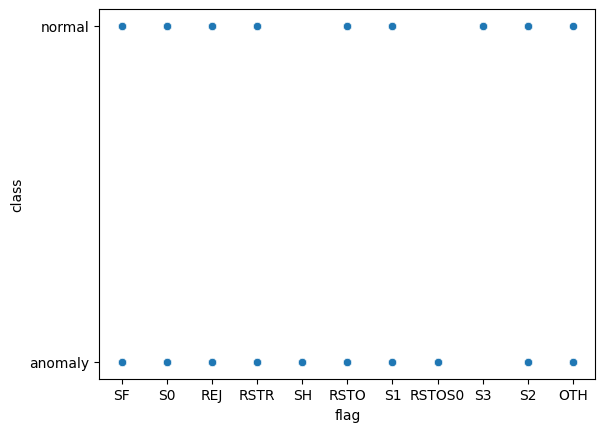

In [ ]:
sns.scatterplot(x=ds['flag'],y=ds['class'])
plt.show()

In [ ]:
flags_grouped = ds.groupby('class')['flag'].unique()
flags_grouped = pd.Series(flags_grouped)
anomaly_flags = set(flags_grouped['anomaly'])
normal_flags = set(flags_grouped['normal'])

unique_to_anomaly = anomaly_flags - normal_flags

# Find flags unique to "normal"
unique_to_normal = normal_flags - anomaly_flags

print("Flags unique to 'anomaly':", unique_to_anomaly)
print("Flags unique to 'normal':", unique_to_normal)

Flags unique to 'anomaly': {'RSTOS0', 'SH'}
Flags unique to 'normal': {'S3'}


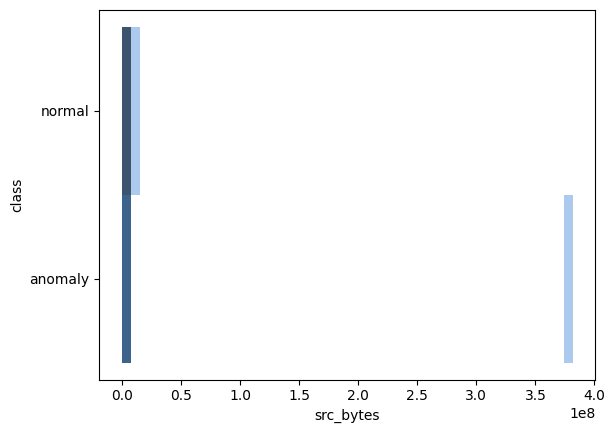

In [ ]:
sns.histplot(x=ds['src_bytes'],y=ds['class'],bins=50, kde=True)
plt.show()

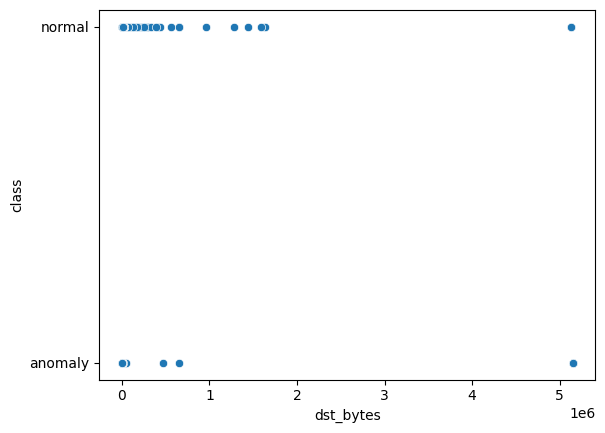

In [ ]:
sns.scatterplot(x=ds['dst_bytes'],y=ds['class'])
plt.show()

In [ ]:
ds.groupby('class')['land'].value_counts()

class    land
anomaly  0       11742
         1           1
normal   0       13448
         1           1
Name: count, dtype: int64

In [ ]:
ds.groupby('wrong_fragment')['class'].value_counts()

wrong_fragment  class  
0               normal     13449
                anomaly    11519
1               anomaly       37
3               anomaly      187
Name: count, dtype: int64

In [ ]:
ds.groupby('urgent')['class'].value_counts()

urgent  class  
0       normal     13449
        anomaly    11742
1       anomaly        1
Name: count, dtype: int64

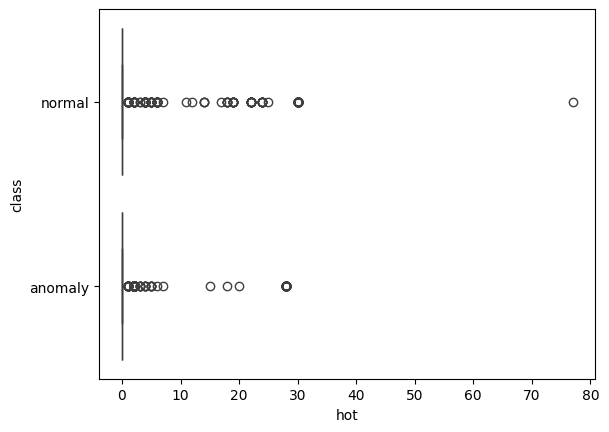

In [ ]:
sns.boxplot(x=ds['hot'],y=ds['class'])
plt.show()

In [ ]:
ds['num_failed_logins'].unique()

array([0, 2, 1, 3, 4])

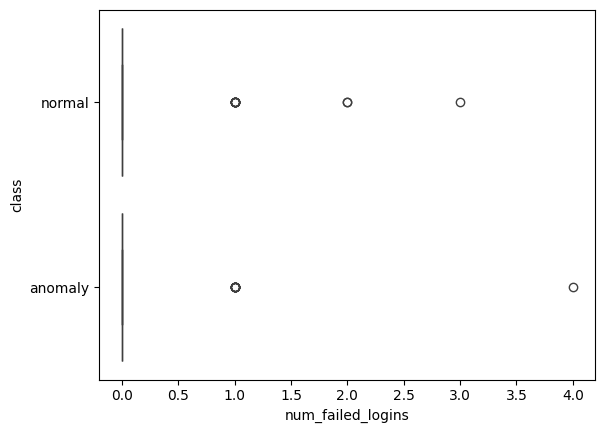

In [ ]:
ds.groupby('num_failed_logins')['class'].value_counts()
sns.boxplot(x=ds['num_failed_logins'],y=ds['class'])
plt.show()

In [ ]:
ds['logged_in'].unique()
ds.groupby('logged_in')['class'].value_counts()

logged_in  class  
0          anomaly    11334
           normal      3913
1          normal      9536
           anomaly      409
Name: count, dtype: int64

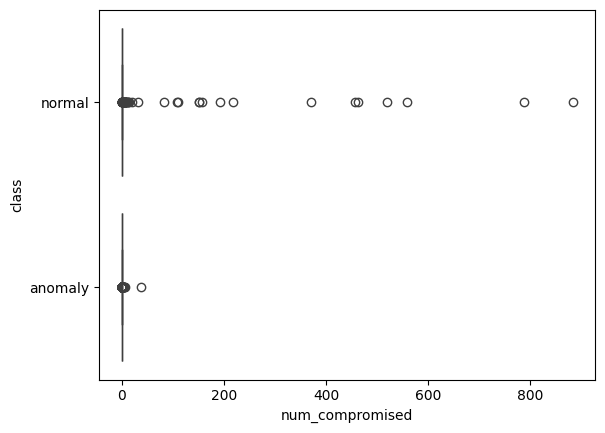

In [ ]:
ds['num_compromised'].unique()
sns.boxplot(x=ds['num_compromised'],y=ds['class'])
plt.show()

In [ ]:
ds.groupby('root_shell')['class'].value_counts()

root_shell  class  
0           normal     13419
            anomaly    11734
1           normal        30
            anomaly        9
Name: count, dtype: int64

In [ ]:
ds['su_attempted'].unique()
ds.groupby('su_attempted')['class'].value_counts()

su_attempted  class  
0             normal     13428
              anomaly    11743
1             normal         8
2             normal        13
Name: count, dtype: int64

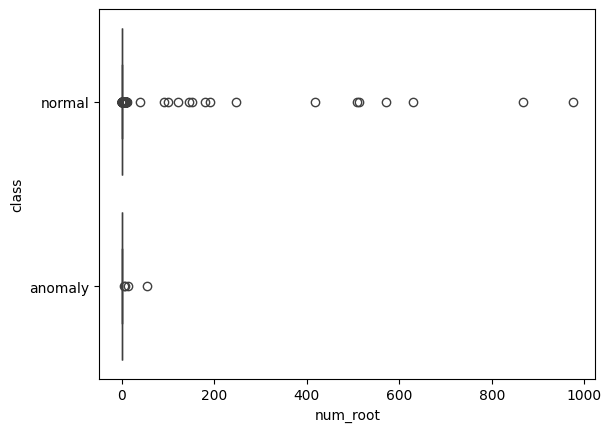

In [ ]:
ds['num_root'].describe()
sns.boxplot(x=ds['num_root'],y=ds['class'])
plt.show()


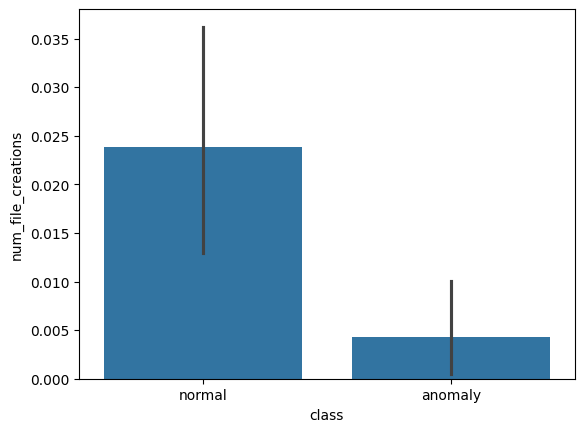

In [ ]:
df['num_file_creations'].describe()
df.groupby('num_file_creations')['class'].value_counts()
sns.barplot(x=ds['class'],y=ds['num_file_creations'])
plt.show()

In [ ]:
ds['num_shells'].describe()
ds.groupby('num_shells')['class'].value_counts()

num_shells  class  
0           normal     13441
            anomaly    11742
1           normal         8
            anomaly        1
Name: count, dtype: int64

In [ ]:
ds['num_access_files'].describe()
ds.groupby('num_access_files')['class'].value_counts()

num_access_files  class  
0                 normal     13374
                  anomaly    11739
1                 normal        62
                  anomaly        3
2                 normal         7
                  anomaly        1
3                 normal         2
4                 normal         1
5                 normal         2
8                 normal         1
Name: count, dtype: int64

In [ ]:
ds['num_outbound_cmds'].describe()
ds.groupby('num_outbound_cmds')['class'].value_counts()

num_outbound_cmds  class  
0                  normal     13449
                   anomaly    11743
Name: count, dtype: int64

In [ ]:
ds['is_host_login'].describe()
ds.groupby('is_host_login')['class'].value_counts()

is_host_login  class  
0              normal     13449
               anomaly    11743
Name: count, dtype: int64

In [ ]:
ds['is_guest_login'].describe()
ds.groupby('is_guest_login')['class'].value_counts()

is_guest_login  class  
0               normal     13280
                anomaly    11682
1               normal       169
                anomaly       61
Name: count, dtype: int64

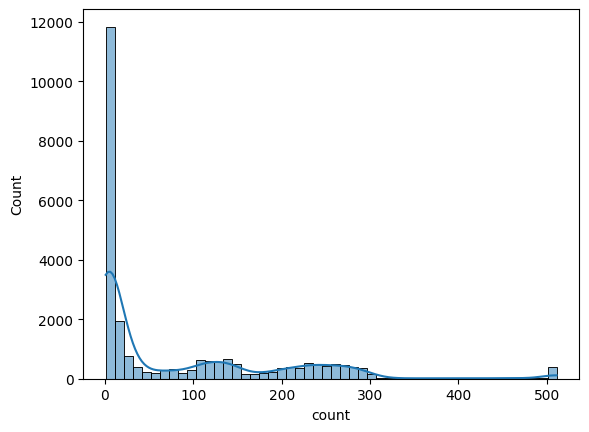

In [ ]:
ds['count'].describe()
sns.histplot(ds['count'],bins=50, kde=True)
plt.show()

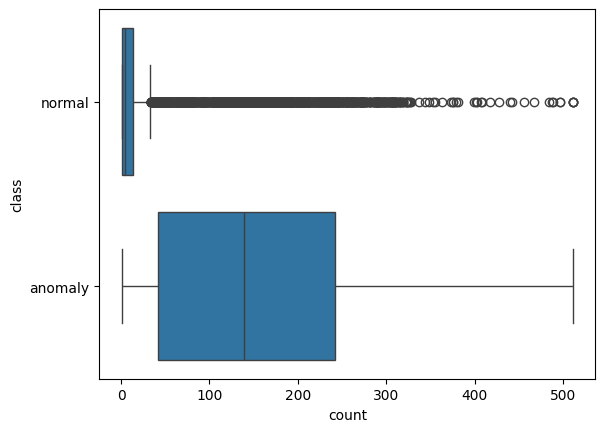

In [ ]:
ds.groupby('count')['class'].value_counts()
sns.boxplot(x=ds['count'],y = ds['class'])
plt.show()

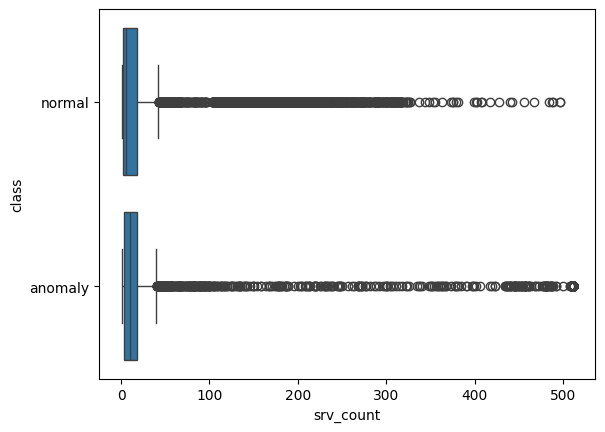

In [ ]:
ds['srv_count'].describe()
sns.boxplot(x=ds['srv_count'],y=ds['class'])
plt.show()

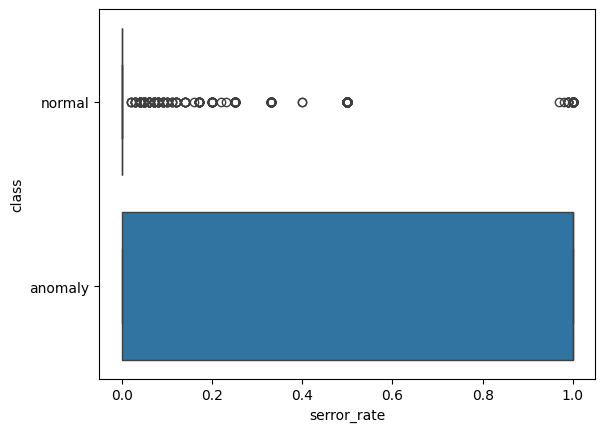

In [ ]:
ds['serror_rate'].describe()
sns.boxplot(x=ds['serror_rate'],y=ds['class'])
plt.show()

In [ ]:
ds.groupby('serror_rate')['class'].value_counts()

serror_rate  class  
0.00         normal     12991
             anomaly     4338
0.01         anomaly       46
0.02         anomaly       13
             normal         3
                        ...  
0.98         normal         1
0.99         anomaly       34
             normal         7
1.00         anomaly     6853
             normal        88
Name: count, Length: 95, dtype: int64

[]

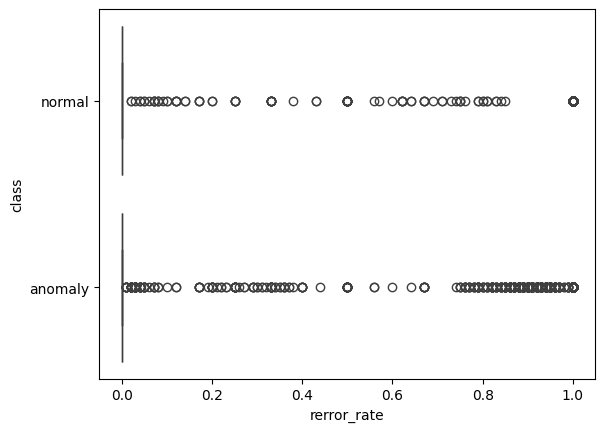

In [ ]:
sns.boxplot(x=ds['rerror_rate'],y=ds['class'])
plt.plot()


           count      mean       std  min  25%  50%  75%  max
class                                                        
anomaly  11743.0  0.206246  0.398359  0.0  0.0  0.0  0.0  1.0
normal   13449.0  0.042128  0.197993  0.0  0.0  0.0  0.0  1.0


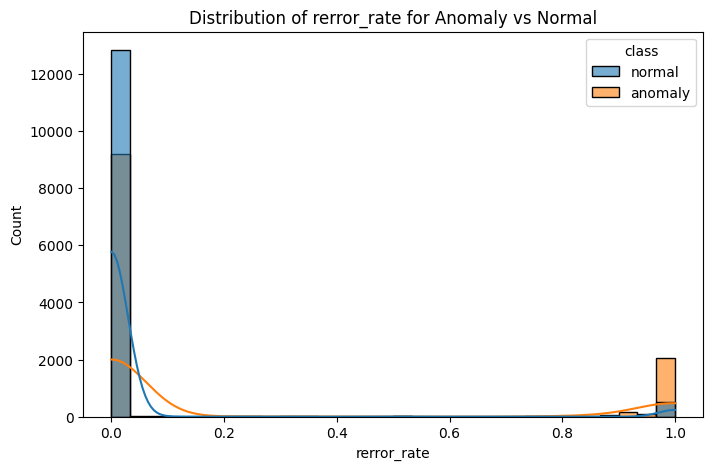

In [ ]:
print(ds.groupby("class")["rerror_rate"].describe())
plt.figure(figsize=(8, 5))
sns.histplot(data=ds, x="rerror_rate", hue="class", kde=True, bins=30, alpha=0.6)
plt.title("Distribution of rerror_rate for Anomaly vs Normal")
plt.show()

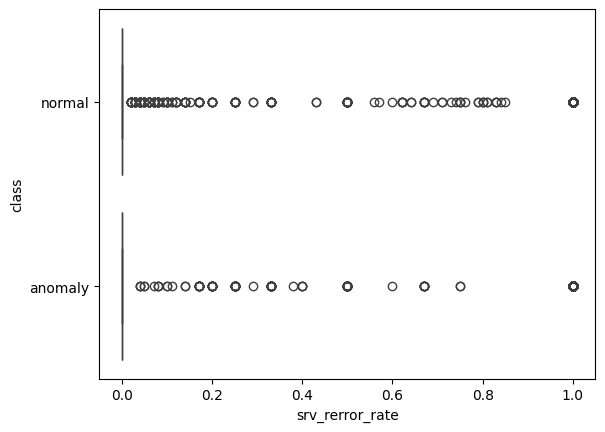

In [ ]:
ds['srv_rerror_rate'].describe()
ds.groupby('class')['srv_rerror_rate'].describe()
sns.boxplot(x=ds['srv_rerror_rate'],y=ds['class'])
plt.show()

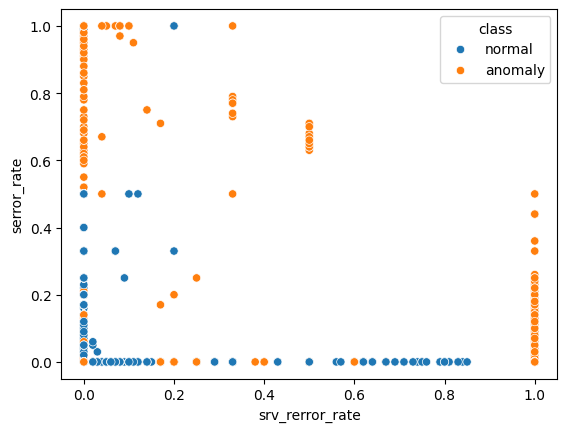

In [ ]:
sns.scatterplot(data=ds,x='srv_rerror_rate',y='serror_rate',hue='class')
plt.show()

In [ ]:
required_srv_rerror_rate_len = len(ds[(ds['srv_rerror_rate']>0.3) & (ds['class']=='normal')])
print(required_srv_rerror_rate_len/len(ds[ds['class']=='normal']))

0.044464272436612384


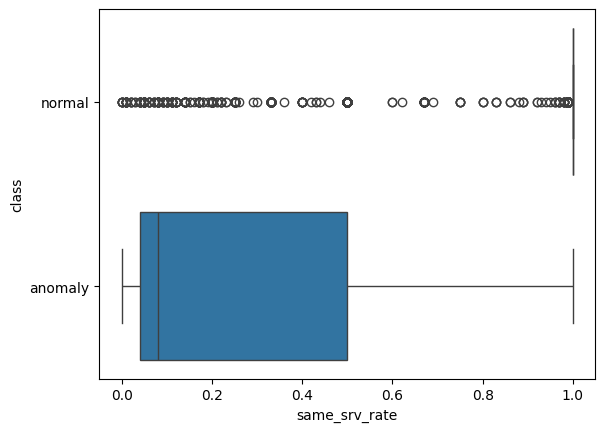

In [ ]:
sns.boxplot(x=ds['same_srv_rate'],y=ds['class'])
plt.show()

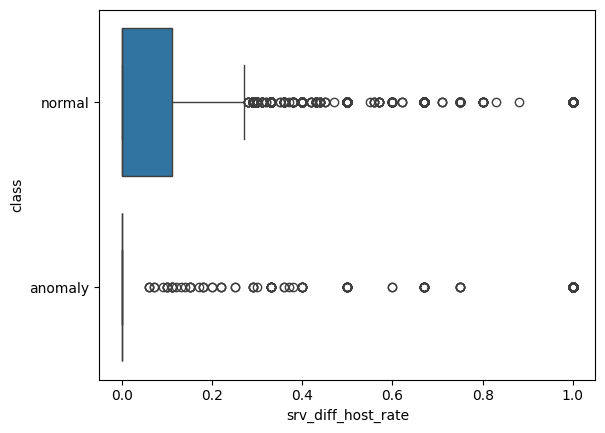

In [ ]:
ds['srv_diff_host_rate'].unique()
ds.groupby('srv_diff_host_rate')['class'].value_counts()
sns.boxplot(x=ds['srv_diff_host_rate'],y=ds['class'])
plt.show()

In [ ]:
print(len(ds[(ds['class']=='anomaly') & (ds['srv_diff_host_rate']==0)])/len(ds[ds['class']=='anomaly']))

0.9317891509835646


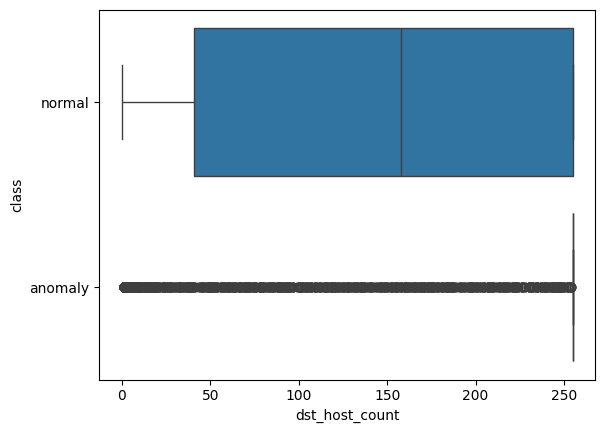

In [ ]:
sns.boxplot(x=ds['dst_host_count'],y=ds['class'])
plt.show()

In [ ]:
ds.groupby('class')['dst_host_count'].describe()
print(len(ds[(ds['class']=='anomaly') & (ds['dst_host_count']==ds['dst_host_count'].max())])/len(ds[ds['class']=='anomaly']))

0.8226177297113174


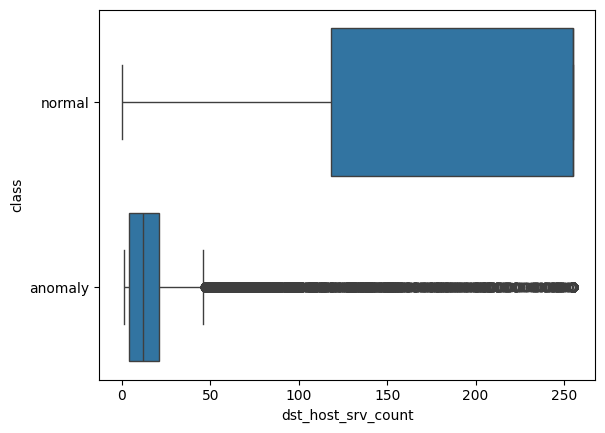

In [ ]:
ds['dst_host_srv_count'].describe()
ds.groupby('dst_host_srv_count')['class'].value_counts()
sns.boxplot(x=ds['dst_host_srv_count'],y=ds['class'])
plt.show()

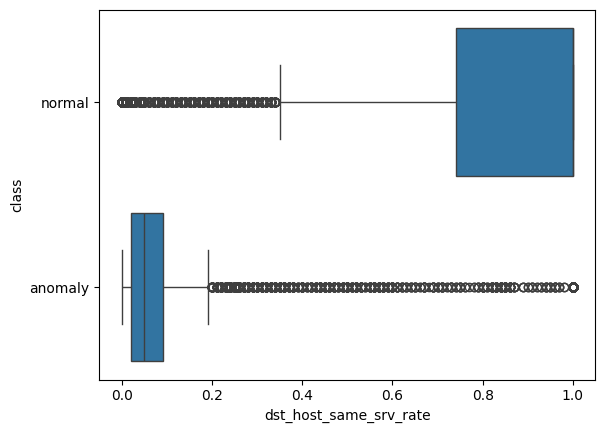

In [ ]:
sns.boxplot(x=ds['dst_host_same_srv_rate'],y=ds['class'])
plt.show()

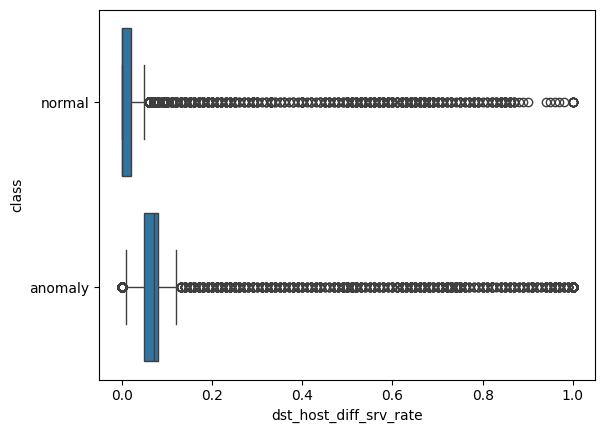

In [ ]:
sns.boxplot(x=ds['dst_host_diff_srv_rate'],y=ds['class'])
plt.show()

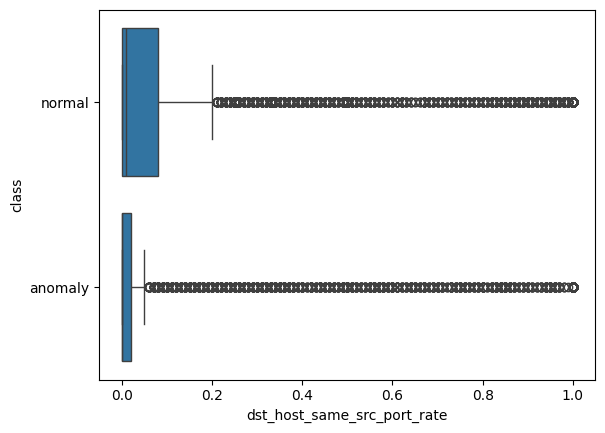

In [ ]:
sns.boxplot(x=ds['dst_host_same_src_port_rate'],y=ds['class'])
plt.show()

In [ ]:
print(len(ds[(ds['class']=='anomaly') & (ds['dst_host_same_src_port_rate']<=0.1)])/len(ds[ds['class']=='anomaly']))
print(len(ds[(ds['class']=='normal') & (ds['dst_host_same_src_port_rate']<=0.1)])/len(ds[ds['class']=='normal']))

0.7815720003406285
0.7808759015540189


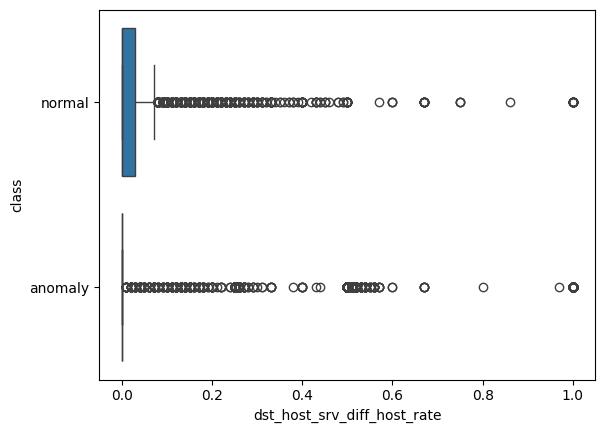

In [ ]:
sns.boxplot(x=ds['dst_host_srv_diff_host_rate'],y=ds['class'])
plt.show()

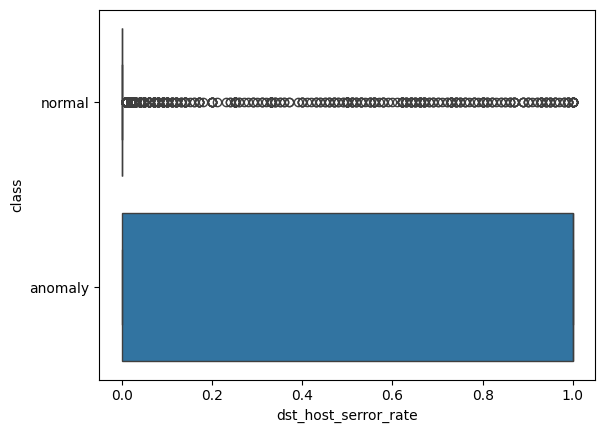

In [ ]:
sns.boxplot(x=ds['dst_host_serror_rate'],y=ds['class'])
plt.show()

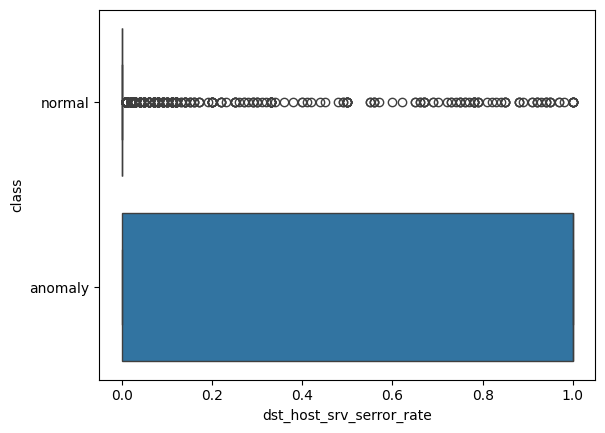

In [ ]:
sns.boxplot(x=ds['dst_host_srv_serror_rate'],y=ds['class'])
plt.show()

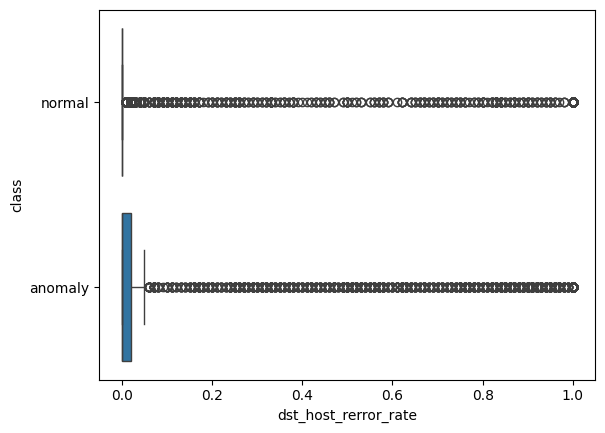

In [ ]:
sns.boxplot(x=ds['dst_host_rerror_rate'],y=ds['class'])
plt.show()

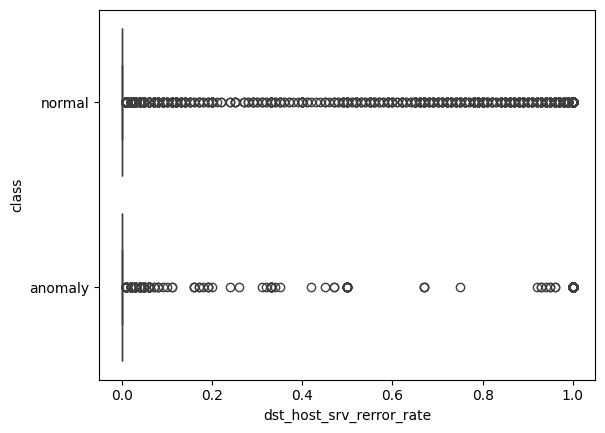

In [ ]:
sns.boxplot(x=ds['dst_host_srv_rerror_rate'],y=ds['class'])
plt.show()

In [ ]:
ds.drop(columns=[
"service",
"src_bytes", "dst_bytes",
"land" ,
"urgent",
"hot",
"num_failed_logins",
"logged_in",
"root_shell",
"su_attempted",
"num_root",
"num_file_creations",
"num_shells",
"num_access_files",
"num_outbound_cmds",
"is_host_login",
"is_guest_login",
"srv_count",
"diff_srv_rate",
"dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate",
"dst_host_rerror_rate",
"dst_host_srv_rerror_rate"],inplace=True)
ds.head()


,duration,protocol_type,flag,wrong_fragment,num_compromised,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,class
0,0,tcp,SF,0,0,2,0.0,0.0,0.0,0.0,1.00,0.00,150,25,0.17,0.03,0.00,0.00,normal
1,0,udp,SF,0,0,13,0.0,0.0,0.0,0.0,0.08,0.00,255,1,0.00,0.60,0.00,0.00,normal
2,0,tcp,S0,0,0,123,1.0,1.0,0.0,0.0,0.05,0.00,255,26,0.10,0.05,1.00,1.00,anomaly
3,0,tcp,SF,0,0,5,0.2,0.2,0.0,0.0,1.00,0.00,30,255,1.00,0.00,0.03,0.01,normal
4,0,tcp,SF,0,0,30,0.0,0.0,0.0,0.0,1.00,0.09,255,255,1.00,0.00,0.00,0.00,normal


In [ ]:
ds = pd.get_dummies(ds,columns=['protocol_type','flag'],drop_first=True)
ds.head()

,duration,wrong_fragment,num_compromised,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,srv_diff_host_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,2,0.0,0.0,0.0,0.0,1.00,0.00,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,13,0.0,0.0,0.0,0.0,0.08,0.00,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,123,1.0,1.0,0.0,0.0,0.05,0.00,...,False,False,False,False,True,False,False,False,False,False
3,0,0,0,5,0.2,0.2,0.0,0.0,1.00,0.00,...,False,False,False,False,False,False,False,False,True,False
4,0,0,0,30,0.0,0.0,0.0,0.0,1.00,0.09,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['count','duration','dst_host_count','dst_host_srv_count']
scalar = MinMaxScaler()
ds[columns_to_normalize] = scalar.fit_transform(ds[columns_to_normalize])
joblib.dump(scalar,"minMaxScalar.pk1")
ds.head()

,duration,wrong_fragment,num_compromised,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,srv_diff_host_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,0,0,0.001961,0.0,0.0,0.0,0.0,1.00,0.00,...,False,False,False,False,False,False,False,False,True,False
1,0.0,0,0,0.023529,0.0,0.0,0.0,0.0,0.08,0.00,...,False,False,False,False,False,False,False,False,True,False
2,0.0,0,0,0.239216,1.0,1.0,0.0,0.0,0.05,0.00,...,False,False,False,False,True,False,False,False,False,False
3,0.0,0,0,0.007843,0.2,0.2,0.0,0.0,1.00,0.00,...,False,False,False,False,False,False,False,False,True,False
4,0.0,0,0,0.056863,0.0,0.0,0.0,0.0,1.00,0.09,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
ds['count'].describe()

count    25192.000000
mean         0.163904
std          0.224850
min          0.000000
25%          0.001961
50%          0.025490
75%          0.280392
max          1.000000
Name: count, dtype: float64

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px

df = ds.drop(columns=['class'])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Class'] = ds['class']
fig = px.scatter(df_pca, x='PC1', y='PC2', color=df_pca['Class'].astype(str),
                 title='PCA Visualization for Linear Separability Check',
                 labels={'Class': 'Class (0=normal, 1=anomaly)'},
                 opacity=0.5)
fig.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import joblib

y = ds['class'].values
ds.drop(columns=['class'],inplace=True)
X = ds[:].values
svm_model = SVC(kernel='linear')
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=0.8)
svm_model.fit(X_train,y_train)
joblib.dump(svm_model,"svm_model.pk1")

['svm_model.pk1']

In [ ]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

SVM Accuracy: 0.9607
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.97      0.94      0.96      2326
      normal       0.95      0.98      0.96      2713

    accuracy                           0.96      5039
   macro avg       0.96      0.96      0.96      5039
weighted avg       0.96      0.96      0.96      5039



In [ ]:
testing = pd.read_csv("./Test_data.csv")
testing = pd.get_dummies(testing,columns=['protocol_type','flag'],drop_first=True)
testing.drop(columns=[
"service",
"src_bytes", "dst_bytes",
"land" ,
"urgent",
"hot",
"num_failed_logins",
"logged_in",
"root_shell",
"su_attempted",
"num_root",
"num_file_creations",
"num_shells",
"num_access_files",
"num_outbound_cmds",
"is_host_login",
"is_guest_login",
"srv_count",
"diff_srv_rate",
"dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate",
"dst_host_rerror_rate",
"dst_host_srv_rerror_rate"],inplace=True)
X_test = testing[:].values
y_pred = svm_model.predict(X_test)
y_pred = pd.DataFrame(y_pred)
testing['class'] = y_pred
testing.head()


,duration,wrong_fragment,num_compromised,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,srv_diff_host_rate,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,class
0,0,0,0,229,0.0,0.00,1.0,1.0,0.04,0.00,...,False,False,False,False,False,False,False,False,False,anomaly
1,0,0,0,136,0.0,0.00,1.0,1.0,0.01,0.00,...,False,False,False,False,False,False,False,False,False,anomaly
2,2,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,...,False,False,False,False,False,False,False,True,False,normal
3,0,0,0,1,0.0,0.00,0.0,0.0,1.00,1.00,...,False,False,False,False,False,False,False,True,False,normal
4,1,0,0,1,0.0,0.12,1.0,0.5,1.00,0.75,...,True,False,False,False,False,False,False,False,False,normal


In [ ]:
print(testing.columns.tolist())


['duration', 'wrong_fragment', 'num_compromised', 'count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'protocol_type_tcp', 'protocol_type_udp', 'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH', 'class']
